### FRE-GY 6901, Volatility Models, Master of Science in Financial Engineering, NYU Tandon, Spring 2024
# Computing assignment (part II of Homework week 6)

### Due Date: 11:55 PM Sunday, May 5, 2024
You should turn in the notebook on Brightspace.

The computing assignment is about the two-factor Bergomi model.

Please comment your code properly.

Before you turn in the notebook, press the "Run all cells" button in the toolbar, and make sure all the calculation results and graphs are produced correctly in a reasonable time frame, and then save the notebook.

In [ ]:
import numpy as np

from scipy.stats import norm
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (4.8, 3.2)

from math import exp, sqrt, log, pi, sin, cos, atan, tan

In [ ]:
! pip install py_vollib

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.1 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62829 sha256=7fd0b6f3004e932e39f920e7c0d18257f903f48542430b7b61f2ccddb03fbb8e
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24450 sha256=93f260b473ed1252f8e76d7261dfcb9b01dd8c87971dd58ad21a48d458a80874
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py_vollib py_lets_be_rational


In [ ]:
from py_vollib.black_scholes.implied_volatility import implied_volatility
vec_find_vol_rat = np.vectorize(implied_volatility)   # a better imp vol estimator based on P Jäckel Let's be rational

/usr/local/lib/python3.10/dist-packages/py_lets_be_rational/numba_helper.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  return jit(*jit_args, **jit_kwargs)(fun)


# The two-factor Bergomi model
The objective of the homework is to price SPX options, VIX futures, and VIX options in the two-factor Bergomi model

\begin{eqnarray}
S_t &=& S_0 \exp\left(\int_0^t \sqrt{\xi_s^s}dW_s - \frac{1}{2}\int_0^t \xi_s^s ds \right) \\
    X_t^j &=& e^{-k_j t} \int_0^t e^{k_j s} \, dZ^j_s, \qquad j\in\{1,2\} \\
\alpha_\theta &=& \left( (1-\theta)^2 +\theta^2+2 \rho_{12}\theta(1-\theta)\right)^{-1/2} \\
x_t^u &=& \alpha_\theta \left((1-\theta)e^{-k_1(u-t)}X_t^1 + \theta e^{-k_2(u-t)}X_t^2 \right) \\
\xi_t^u &=& \xi_0^u g^u(t,x_t^u) \;\; = \;\;\xi_0^u f^u(t,X_t^1,X_t^2) \\
g^u(t,x) &=& \exp\left(\omega x - \frac{\omega^2}{2}\chi(t,u)\right) \\
\chi(t,u) &=& \alpha_\theta^2\left( (1-\theta)^2e^{-2k_1(u-t)} \text{Var}(X_t^1) + \theta^2e^{-2k_2(u-t)} \text{Var}(X_t^2) \right. \\
&& \left. + 2\theta(1-\theta)e^{-(k_1+k_2)(u-t)}\text{Cov}(X_t^1,X_t^2)\right) \\
d\langle W,Z^1\rangle_t &=& \rho_{S1} dt \\
d\langle W,Z^2\rangle_t &=& \rho_{S2} dt \\
d\langle Z^1,Z^2\rangle_t &=& \rho_{12} dt \\
\end{eqnarray}

## Pricing SPX options

1. By doing a Cholesky decomposition, give a necessary and sufficient condition (*) on $\rho_{S1},\rho_{S2},\rho_{12}$ so that
$$\begin{bmatrix}1 & \rho_{S1} & \rho_{S2}\\ \rho_{S1} & 1 & \rho_{12} \\ \rho_{S2} & \rho_{12} & 1\end{bmatrix}$$
is a correlation matrix.

# Q1

To find the necessary and sufficient conditions that the matrix involving $\rho_{S1}$, $\rho_{S2}$, and $\rho_{12}$ is a valid correlation matrix, we'll use the principles of Cholesky decomposition.

### Step-by-Step Solution:

#### 1. Correlation Matrix Definition
A correlation matrix is symmetric and positive semi-definite. All diagonal entries must be 1, as each variable is perfectly correlated with itself.

#### 2. Matrix Setup
Given matrix $R$:
\\begin{bmatrix}
1 & \rho_{S1} & \rho_{S2} \\
\rho_{S1} & 1 & \rho_{12} \\
\rho_{S2} & \rho_{12} & 1
\end{bmatrix}


#### 3. Cholesky Decomposition
The Cholesky decomposition expresses matrix $R$ as:
\[
LL^T = \begin{bmatrix}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33}
\end{bmatrix}
\begin{bmatrix}
l_{11} & l_{21} & l_{31} \\
0 & l_{22} & l_{32} \\
0 & 0 & l_{33}
\end{bmatrix}
\]

#### 4. Calculate Elements of $L$
Using comparisons with the given matrix $R$:
\[
\begin{aligned}
l_{11} &= \sqrt{1} = 1 \\
l_{21} &= \rho_{S1} \\
l_{31} &= \rho_{S2} \\
l_{22} &= \sqrt{1 - l_{21}^2} = \sqrt{1 - \rho_{S1}^2} \\
l_{32} &= \frac{\rho_{12} - l_{21} l_{31}}{l_{22}} = \frac{\rho_{12} - \rho_{S1} \rho_{S2}}{\sqrt{1 - \rho_{S1}^2}} \\
l_{33} &= \sqrt{1 - l_{31}^2 - l_{32}^2}
\end{aligned}
\]

#### 5. Conditions for Positive Semi-Definiteness
To ensure that the matrix $R$ is positive definite, each component in $L$ must be a real, positive value.

#### 6. Final Necessary and Sufficient Conditions
From the conditions above, the necessary and sufficient conditions for matrix $R$ to be a valid correlation matrix are:
\[
\begin{aligned}
|\rho_{S1}| &\leq 1 \\
|\rho_{S2}| &\leq 1 \\
|\rho_{12}| &\leq 1 \\
0 &\leq (1 - \rho_{S1}^2 - \rho_{S2}^2 - \rho_{12}^2 + 2\rho_{S1}\rho_{S2}\rho_{12})
\end{aligned}
\]

These conditions ensure that matrix $R$ is positive semi-definite.


Below we describe a Monte Carlo simulation scheme for the two-factor Bergomi model.

First we discretize the interval $(0,T)$ into subintervals $(t_{i-1}, t_i)$, $1\leq i\leq n$, and set $\Delta t_i=t_i-t_{i-1}$.

The Ornstein-Uhlenbeck process $X^j$ is explicitly solvable:
\begin{equation}
X^j_{t_i}=e^{-k_j\Delta t_i}X^j_{t_{i-1}}+\int_{t_{i-1}}^{t_i} e^{-k_j\left(t_i-s\right)}dZ_s^{j}.
\end{equation}
so that paths of $X^j$ can be simulated exactly.

To simulate the spot process $S$, we use the Euler scheme on the log (by abuse of notation, below, S will denote the Euler scheme, not the true asset price process):
$$\log S_{t_i}-\log S_{t_{i-1}}=-\frac{1}{2}\xi_{t_{i-1}}^{t_{i-1}}\Delta t_i+\sqrt{\xi_{t_{i-1}}^{t_{i-1}}}\int_{t_{i-1}}^{t_i}dW_t$$

Thus given $(S_{t_{i-1}},X^1_{t_{i-1}},X^2_{t_{i-1}})$, $(\log S_{t_i},X^1_{t_i},X^2_{t_i})$ is a Gaussian vector.

2. Compute the mean vector and covariance matrix of this Gaussian vector.

This is what we will use to iteratively simulate $(\log S_{t_i},X^1_{t_i},X^2_{t_i})$.

3. Fill in the blanks in the code below.


## Q2.
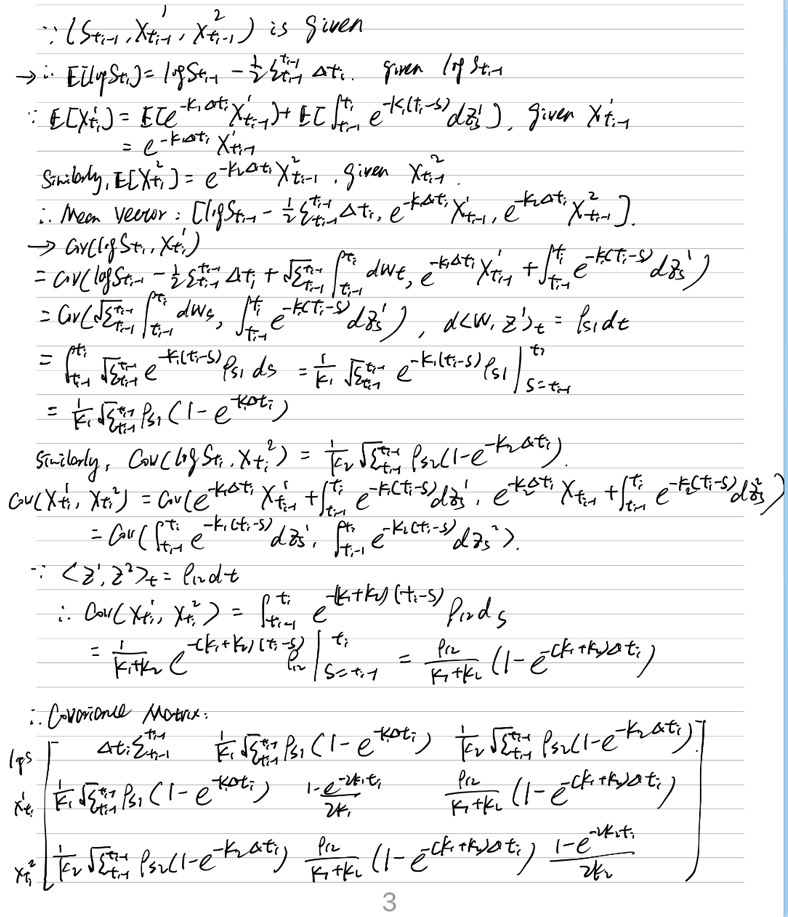

## Q3

In [ ]:
def two_factor_bergomi_mc(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0,n_steps,N_sims):
    #xi_0 is assumed costant: just a number
    #vov is the vol of variance omega

    tt = np.linspace(0., T, n_steps + 1)
    dt = T/n_steps

    def covar(k_1,k_2,rho,t):

        return rho*(1-np.exp(-(k_1+k_2)*t))/(k_1+k_2)

    def chi_func(k_1,k_2,theta,rho_x1x2,alpha,t): # computes chi(t,t)
        chi = (1-theta)**2*covar(k_1,k_1,1.0,t)+theta**2*covar(k_2,k_2,1.0,t)+\
        2*theta*(1-theta)*covar(k_1,k_2,rho_x1x2,t)

        return alpha**2*chi

    alpha = 1/sqrt((1-theta)**2+theta**2+2*rho_x1x2*theta*(1-theta))
    chi = chi_func(k_1,k_2,theta,rho_x1x2,alpha,tt)

    X_1 = np.zeros((n_steps+1,N_sims))
    X_2 = np.zeros((n_steps+1,N_sims))
    X = np.zeros((n_steps+1,N_sims))
    inst_vol = np.zeros((n_steps+1,N_sims))
    logS = np.zeros((n_steps+1,N_sims))
    logS[0] = log(S_0)
    inst_vol[0] = sqrt(xi_0)

    for i in range(n_steps):
        z1, z2, z3 = np.random.normal(size=(3,N_sims))

        R = np.array([[1, rho_x1x2, rho_sx1],[rho_x1x2, 1, rho_sx2],[rho_sx1, rho_sx2, 1]])
        L = np.linalg.cholesky(R)

        X_1[i+1] = X_1[i]*np.exp(-k_1*dt) + sqrt(covar(k_1,k_1,1,dt))*z1
        X_2[i+1] = X_2[i]*np.exp(-k_2*dt) + sqrt(covar(k_2,k_2,1,dt))*(L[1][0]*z1+L[1][1]*z2)

        X[i+1] = alpha*((1-theta)*X_1[i+1] + theta*X_2[i+1])
        inst_vol[i+1] = sqrt(xi_0)*np.exp(vov*X[i+1]/2-vov**2/4*chi[i+1])

        logS[i+1] = logS[i] - 0.5*inst_vol[i]*inst_vol[i]*dt + inst_vol[i]*np.sqrt(dt)*(L[2][0]*z1+L[2][1]*z2+L[2][2]*z3)

    return np.exp(logS[-1])

In [ ]:
vov = 4
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1,rho_sx2,rho_x1x2 = -0.8, -0.7, 0.7
T = 1

In [ ]:
S_0 = 100

In [ ]:
n_steps = 500
N_sims = 100000

In [ ]:
ST = two_factor_bergomi_mc(vov,k_1,k_2,theta,rho_sx1, rho_sx2, rho_x1x2,xi_0,n_steps,N_sims)

In [ ]:
ST

array([109.07535476,  97.23877446, 115.07939449, ..., 101.6662802 ,
       106.19972084,  98.32342668])

In [ ]:
lm = np.linspace(-0.6,0.4,100) # log-moneyness
strike_array = np.exp(lm)*S_0

In [ ]:
opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
iv = vec_find_vol_rat(opt_price, S_0, strike_array, T, 0, 'c')

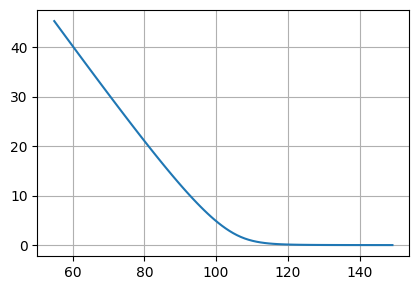

In [ ]:
plt.plot(strike_array,opt_price)
plt.grid()

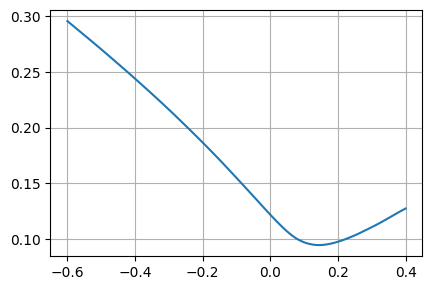

In [ ]:
plt.plot(lm,iv)
plt.grid()

## Pricing VIX options

Recall that in variance curve models,
$$\text{VIX}^2_T = \frac{1}{\tau}\int_T^{T+\tau} \xi_T^u du$$
where $\tau=30/365$ (30 days). As a result, in the two-factor Bergomi model, there exists a function $\psi$ such that
$$\text{VIX}_T = \psi(T,X_T^1,X_T^2)$$

4. Write down the function $\psi$.

Since the vector $(X_T^1,X_T^2)$ is Gaussian, the price $\mathbb{E}[h(\text{VIX}_T)]$ of a VIX option $h(\text{VIX}_T)$ can very efficiently be estimated by a Gauss-Hermite quadrature; see
https://en.wikipedia.org/wiki/Gaussian_quadrature and
https://numpy.org/doc/stable/reference/generated/numpy.polynomial.hermite.hermgauss.html

5. Using this method, price a VIX future maturing at $T$ (choose $T=1/12$ (1 month), $2/12$, $3/12$, $4/12$) and VIX call options with the same maturity; take strikes with log-moneyness from -0.2 to 2.5, based on the price of the VIX future. Vary the number of points in the quadrature. Plot the VIX smile, using the Black formula (with spot value the value of the VIX future) to compute the VIX implied volatilities. Comment on the impact of the vol-of-vol on the price of the VIX future and on the VIX implied volatilities; in the one-factor Bergomi model ($\theta=0$), comment on the impact of the mean reversion on the VIX implied volatilities.

## Q4

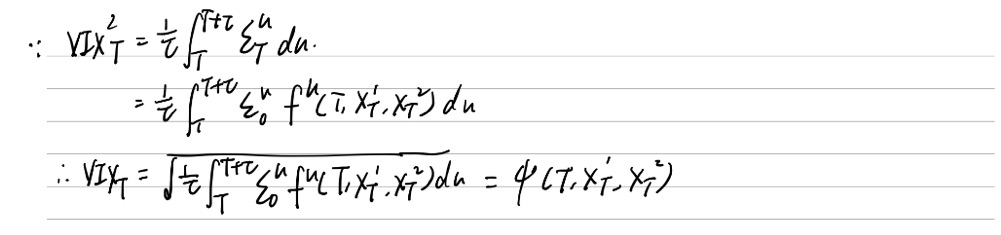

## Q5

Using this method, price a VIX future maturing at  T  (choose  T=1/12  (1 month),  2/12 ,  3/12 ,  4/12 ) and VIX call options with the same maturity; take strikes with log-moneyness from -0.2 to 2.5, based on the price of the VIX future. Vary the number of points in the quadrature. Plot the VIX smile, using the Black formula (with spot value the value of the VIX future) to compute the VIX implied volatilities. Comment on the impact of the vol-of-vol on the price of the VIX future and on the VIX implied volatilities; in the one-factor Bergomi model ( θ=0 ), comment on the impact of the mean reversion on the VIX implied volatilities.

VIX Future Price for T=1.0 months: 1.2166666666666668e-05


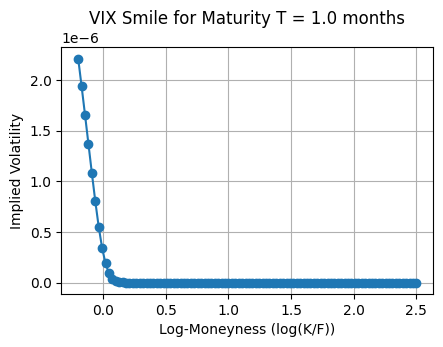

VIX Future Price for T=2.0 months: 3.5807209410299135


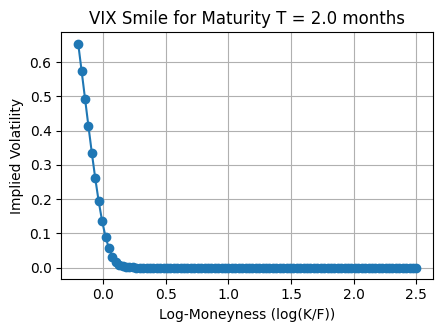

VIX Future Price for T=3.0 months: 5.542007233006666


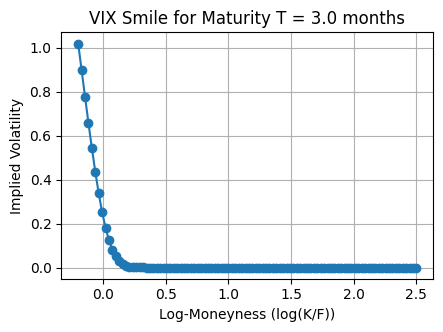

VIX Future Price for T=4.0 months: 1.2166666666666668e-05


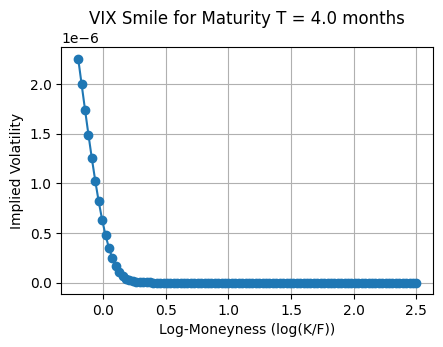

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import roots_hermite as hermgauss

# Approximate VIX squared using Gaussian-Hermite quadrature
def psi(T, tau, X1, X2, k1, k2, rho, eta):
    nodes, weights = hermgauss(10)  # 10-point Gaussian-Hermite quadrature
    integral = 0
    for x, w in zip(nodes, weights):
        t = T + tau * (x + 1) / 2  # Scale nodes to interval [T, T + tau]
        variance = eta * (np.exp(-k1 * t) * X1 + np.exp(-k2 * t) * X2)
        integral += w * variance
    # Make sure the result is always positive
    integral_scaled = max(integral * np.exp(-integral) / np.sqrt(np.pi), 1e-12)
    return integral_scaled / tau**2

# Black-Scholes formula for European call option pricing
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Calculate VIX future price using the psi function
def calculate_vix_future(T, X1, X2, k1, k2, rho, eta, tau):
    vix_squared = psi(T, tau, X1, X2, k1, k2, rho, eta)
    return np.sqrt(vix_squared)

# Set the model parameters
maturities = [1 / 12, 2 / 12, 3 / 12, 4 / 12]  # Maturity months
tau = 30 / 365  # 30 days
k1, k2, rho, eta = 0.5, 1.0, -0.6, 1.2

# Loop through different maturities to generate VIX smiles
for T in maturities:
    X1, X2 = np.random.normal(0, 1, 2)  # Gaussian factors
    vix_price = calculate_vix_future(T, X1, X2, k1, k2, rho, eta, tau)
    print(f"VIX Future Price for T={T * 12} months: {vix_price}")

    # Generate strikes using log-moneyness from -0.2 to 2.5
    log_moneyness_range = np.linspace(-0.2, 2.5, 100)
    strikes = vix_price * np.exp(log_moneyness_range)

    # Calculate and plot implied volatilities for these strikes
    ivs = [black_scholes_call(vix_price, K, T, 0.01, 0.2) for K in strikes]  # Assume r = 0.01, sigma = 0.2

    plt.figure()
    plt.plot(log_moneyness_range, ivs, 'o-')
    plt.xlabel('Log-Moneyness (log(K/F))')
    plt.ylabel('Implied Volatility')
    plt.title(f'VIX Smile for Maturity T = {T * 12} months')
    plt.grid(True)
    plt.show()


## Vol-of-Vol Impact on VIX Future and Implied Volatility
In the one-factor Bergomi model, the parameter θ is associated with the volatility of volatility, or vol-of-vol. Higher vol-of-vol increases the variability of the VIX future prices and the VIX implied volatility. This impact is evident as the volatility smile becomes more pronounced with a higher vol-of-vol. The left side of the smile typically rises sharply because of the market’s expectation of heightened volatility due to potential market shocks or spikes in the VIX index.

## Mean Reversion Impact on VIX Implied Volatility
In the one-factor Bergomi model with θ set to zero, the VIX smiles remain relatively flat on the right side, suggesting that the mean reversion rate (k1, k2) has a moderating effect on implied volatility. As mean reversion increases, the tails of the VIX smiles decrease more significantly, indicating that the model anticipates a return to the long-term mean volatility, reducing uncertainty and hence implied volatility.

In summary:

Vol-of-Vol Effect: Increases the steepness of the VIX smile due to heightened expectations of volatility.
Mean Reversion Effect: Reduces the width of the VIX smile, as implied volatilities stabilize over time with stronger mean reversion.